In [90]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings

from matplotlib.widgets import Lasso

warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [47]:
df=pd.read_csv('lung_cancer_mortality_data_test_v2.csv')
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Female,Slovakia,2016-04-07,Stage IV,2016-04-09,No,Former Smoker,21.2,191,0,0,0,0,Surgery,2017-02-10,0
1,2,50.0,Male,Slovenia,2023-04-22,Stage III,2023-05-05,Yes,Current Smoker,36.4,258,1,0,0,0,Chemotherapy,2024-08-23,0
2,3,65.0,Male,Italy,2023-04-07,Stage II,2023-04-12,Yes,Former Smoker,18.9,174,1,0,1,0,Chemotherapy,2025-03-24,1
3,4,51.0,Male,Latvia,2016-02-07,Stage I,2016-03-08,No,Passive Smoker,38.8,279,1,0,0,0,Combined,2017-03-01,0
4,5,37.0,Female,Spain,2023-12-01,Stage II,2023-12-04,Yes,Former Smoker,37.7,273,0,0,0,0,Combined,2025-07-16,0


In [48]:
df.columns

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'beginning_of_treatment_date', 'family_history', 'smoking_status',
       'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis',
       'other_cancer', 'treatment_type', 'end_treatment_date', 'survived'],
      dtype='object')

In [49]:
df['treatment_type'].unique()


array(['Surgery', 'Chemotherapy', 'Combined', 'Radiation'], dtype=object)

In [50]:
df.duplicated().sum()

0

In [51]:
df.isna().sum()

id                             0
age                            0
gender                         0
country                        0
diagnosis_date                 0
cancer_stage                   0
beginning_of_treatment_date    0
family_history                 0
smoking_status                 0
bmi                            0
cholesterol_level              0
hypertension                   0
asthma                         0
cirrhosis                      0
other_cancer                   0
treatment_type                 0
end_treatment_date             0
survived                       0
dtype: int64

In [52]:
df.dtypes

id                               int64
age                            float64
gender                          object
country                         object
diagnosis_date                  object
cancer_stage                    object
beginning_of_treatment_date     object
family_history                  object
smoking_status                  object
bmi                            float64
cholesterol_level                int64
hypertension                     int64
asthma                           int64
cirrhosis                        int64
other_cancer                     int64
treatment_type                  object
end_treatment_date              object
survived                         int64
dtype: object

In [53]:
df.info

<bound method DataFrame.info of        id   age  gender   country diagnosis_date cancer_stage  \
0       1  64.0  Female  Slovakia     2016-04-07     Stage IV   
1       2  50.0    Male  Slovenia     2023-04-22    Stage III   
2       3  65.0    Male     Italy     2023-04-07     Stage II   
3       4  51.0    Male    Latvia     2016-02-07      Stage I   
4       5  37.0  Female     Spain     2023-12-01     Stage II   
..    ...   ...     ...       ...            ...          ...   
995   996  59.0  Female   Finland     2023-05-17      Stage I   
996   997  46.0    Male   Belgium     2014-12-03    Stage III   
997   998  48.0  Female   Finland     2022-11-02     Stage II   
998   999  65.0  Female  Bulgaria     2015-12-25      Stage I   
999  1000  58.0  Female     Spain     2015-08-09      Stage I   

    beginning_of_treatment_date family_history  smoking_status   bmi  \
0                    2016-04-09             No   Former Smoker  21.2   
1                    2023-05-05            

In [54]:
df.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,54.651000,30.347200,233.174000,0.748000,0.484000,0.250000,0.098000,0.212000
std,288.819436,10.014364,8.287035,43.613299,0.434379,0.499994,0.433229,0.297463,0.408929
min,1.000000,21.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,250.750000,48.000000,23.300000,195.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,500.500000,55.000000,30.200000,241.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,750.250000,61.000000,37.500000,272.000000,1.000000,1.000000,0.250000,0.000000,0.000000
max,1000.000000,90.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
# making a copy in order not to tamper with the original dataset
df1 = df.copy()

In [56]:
#converting date in datetime
df1['diagnosis_date'] = pd.to_datetime(df1['diagnosis_date'])
df1['end_treatment_date'] = pd.to_datetime(df1['end_treatment_date'])


In [57]:
# convert age data type to integer
df1['age'] = df1['age'].astype(int)

In [58]:
df1.dtypes

id                                      int64
age                                     int32
gender                                 object
country                                object
diagnosis_date                 datetime64[ns]
cancer_stage                           object
beginning_of_treatment_date            object
family_history                         object
smoking_status                         object
bmi                                   float64
cholesterol_level                       int64
hypertension                            int64
asthma                                  int64
cirrhosis                               int64
other_cancer                            int64
treatment_type                         object
end_treatment_date             datetime64[ns]
survived                                int64
dtype: object

In [59]:
df1.head()


,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64,Female,Slovakia,2016-04-07,Stage IV,2016-04-09,No,Former Smoker,21.2,191,0,0,0,0,Surgery,2017-02-10,0
1,2,50,Male,Slovenia,2023-04-22,Stage III,2023-05-05,Yes,Current Smoker,36.4,258,1,0,0,0,Chemotherapy,2024-08-23,0
2,3,65,Male,Italy,2023-04-07,Stage II,2023-04-12,Yes,Former Smoker,18.9,174,1,0,1,0,Chemotherapy,2025-03-24,1
3,4,51,Male,Latvia,2016-02-07,Stage I,2016-03-08,No,Passive Smoker,38.8,279,1,0,0,0,Combined,2017-03-01,0
4,5,37,Female,Spain,2023-12-01,Stage II,2023-12-04,Yes,Former Smoker,37.7,273,0,0,0,0,Combined,2025-07-16,0


In [60]:
# creating a new column and calculate number of days under treatment
df1['days_under_treatment'] = (df1['end_treatment_date'] - df1['diagnosis_date']).dt.days

In [61]:
df1.head()

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,days_under_treatment
0,1,64,Female,Slovakia,2016-04-07,Stage IV,2016-04-09,No,Former Smoker,21.2,191,0,0,0,0,Surgery,2017-02-10,0,309
1,2,50,Male,Slovenia,2023-04-22,Stage III,2023-05-05,Yes,Current Smoker,36.4,258,1,0,0,0,Chemotherapy,2024-08-23,0,489
2,3,65,Male,Italy,2023-04-07,Stage II,2023-04-12,Yes,Former Smoker,18.9,174,1,0,1,0,Chemotherapy,2025-03-24,1,717
3,4,51,Male,Latvia,2016-02-07,Stage I,2016-03-08,No,Passive Smoker,38.8,279,1,0,0,0,Combined,2017-03-01,0,388
4,5,37,Female,Spain,2023-12-01,Stage II,2023-12-04,Yes,Former Smoker,37.7,273,0,0,0,0,Combined,2025-07-16,0,593


In [62]:
print(df1.columns)

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'beginning_of_treatment_date', 'family_history', 'smoking_status',
       'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis',
       'other_cancer', 'treatment_type', 'end_treatment_date', 'survived',
       'days_under_treatment'],
      dtype='object')


In [63]:
df1['family_history'] = df1['family_history'].map({'Yes': 1, 'No': 0})

In [64]:
df1.describe()


,id,age,diagnosis_date,family_history,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,end_treatment_date,survived,days_under_treatment
count,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000
mean,500.500000,54.651000,2019-07-08 04:35:02.400000,0.463000,30.347200,233.174000,0.748000,0.484000,0.250000,0.098000,2020-10-04 01:27:50.400000,0.212000,453.870000
min,1.000000,21.000000,2014-06-06 00:00:00,0.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,2015-01-19 00:00:00,0.000000,185.000000
25%,250.750000,48.000000,2017-01-02 18:00:00,0.000000,23.300000,195.000000,0.000000,0.000000,0.000000,0.000000,2018-03-09 00:00:00,0.000000,357.750000
50%,500.500000,55.000000,2019-09-15 12:00:00,0.000000,30.200000,241.000000,1.000000,0.000000,0.000000,0.000000,2021-01-02 12:00:00,0.000000,453.500000
75%,750.250000,61.000000,2021-12-11 00:00:00,1.000000,37.500000,272.000000,1.000000,1.000000,0.250000,0.000000,2023-03-04 06:00:00,0.000000,542.250000
max,1000.000000,90.000000,2024-06-01 00:00:00,1.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,2026-05-22 00:00:00,1.000000,729.000000
std,288.819436,10.014364,NaN,0.498879,8.287035,43.613299,0.434379,0.499994,0.433229,0.297463,NaN,0.408929,137.452728


In [65]:
df1.replace("?",np.nan,inplace=True)

In [66]:
df1.head()

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,days_under_treatment
0,1,64,Female,Slovakia,2016-04-07,Stage IV,2016-04-09,0,Former Smoker,21.2,191,0,0,0,0,Surgery,2017-02-10,0,309
1,2,50,Male,Slovenia,2023-04-22,Stage III,2023-05-05,1,Current Smoker,36.4,258,1,0,0,0,Chemotherapy,2024-08-23,0,489
2,3,65,Male,Italy,2023-04-07,Stage II,2023-04-12,1,Former Smoker,18.9,174,1,0,1,0,Chemotherapy,2025-03-24,1,717
3,4,51,Male,Latvia,2016-02-07,Stage I,2016-03-08,0,Passive Smoker,38.8,279,1,0,0,0,Combined,2017-03-01,0,388
4,5,37,Female,Spain,2023-12-01,Stage II,2023-12-04,1,Former Smoker,37.7,273,0,0,0,0,Combined,2025-07-16,0,593


In [67]:
outliers = []
for feature in df1.select_dtypes(include=np.number).columns:
    Q1 = df1[feature].quantile(0.25)
    Q3 = df1[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    if df1[(df1[feature] < lower_bound) | (df1[feature] > upper_bound)].any(axis=None):
        outliers.append(feature)

print("Attributes with outliers:", outliers)

Attributes with outliers: ['age', 'cirrhosis', 'other_cancer', 'survived']


In [68]:
df1.isnull().sum()

id                             0
age                            0
gender                         0
country                        0
diagnosis_date                 0
cancer_stage                   0
beginning_of_treatment_date    0
family_history                 0
smoking_status                 0
bmi                            0
cholesterol_level              0
hypertension                   0
asthma                         0
cirrhosis                      0
other_cancer                   0
treatment_type                 0
end_treatment_date             0
survived                       0
days_under_treatment           0
dtype: int64

In [69]:
df1.dtypes

id                                      int64
age                                     int32
gender                                 object
country                                object
diagnosis_date                 datetime64[ns]
cancer_stage                           object
beginning_of_treatment_date            object
family_history                          int64
smoking_status                         object
bmi                                   float64
cholesterol_level                       int64
hypertension                            int64
asthma                                  int64
cirrhosis                               int64
other_cancer                            int64
treatment_type                         object
end_treatment_date             datetime64[ns]
survived                                int64
days_under_treatment                    int64
dtype: object

In [70]:
df1["bmi"].bfill()
df1["cholesterol_level"].ffill()

0      191
1      258
2      174
3      279
4      273
      ... 
995    248
996    233
997    155
998    174
999    201
Name: cholesterol_level, Length: 1000, dtype: int64

In [71]:
mean = df1["hypertension"].mean()
df1["hypertension"].replace(np.nan, mean, inplace=True)

mean = df1["asthma"].mean()
df1["asthma"].replace(np.nan, mean, inplace=True)

In [72]:
median = df1["cirrhosis"].median()    #replace by median because there are outliers in this column
df1["cirrhosis"].replace(np.nan,median,inplace=True)

In [73]:
mode = df1["age"].mode()[0]    #replace by mode cuz it's categorical value
df1["age"].replace(np.nan,mode,inplace=True)
mode = df1["other_cancer"].mode()[0]    #replace by mode cuz it's categorical value
df1["other_cancer"].replace(np.nan,mode,inplace=True)

In [79]:
numerical_columns = df1.select_dtypes(include=['number']).columns.tolist()
if 'survived' in numerical_columns:
    numerical_columns.remove('survived')
    numerical_columns.remove('id')
numerical_columns

['age',
 'family_history',
 'bmi',
 'cholesterol_level',
 'hypertension',
 'asthma',
 'cirrhosis',
 'other_cancer',
 'days_under_treatment']

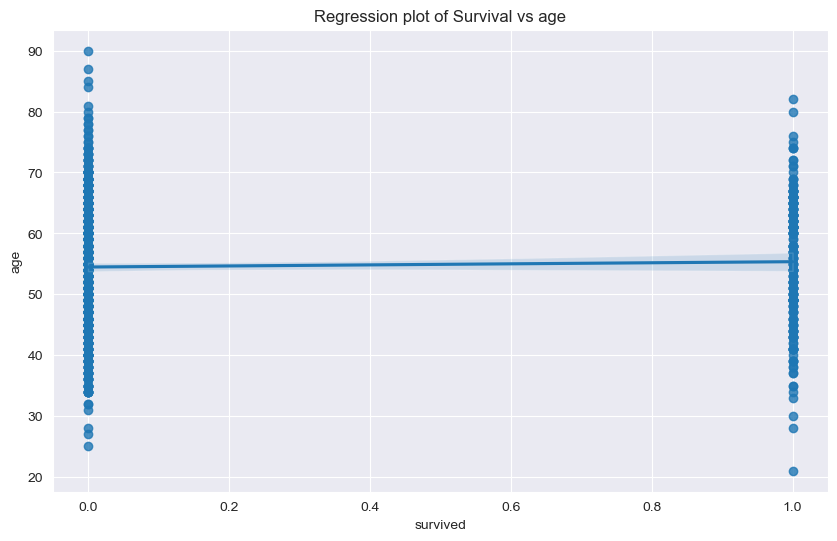

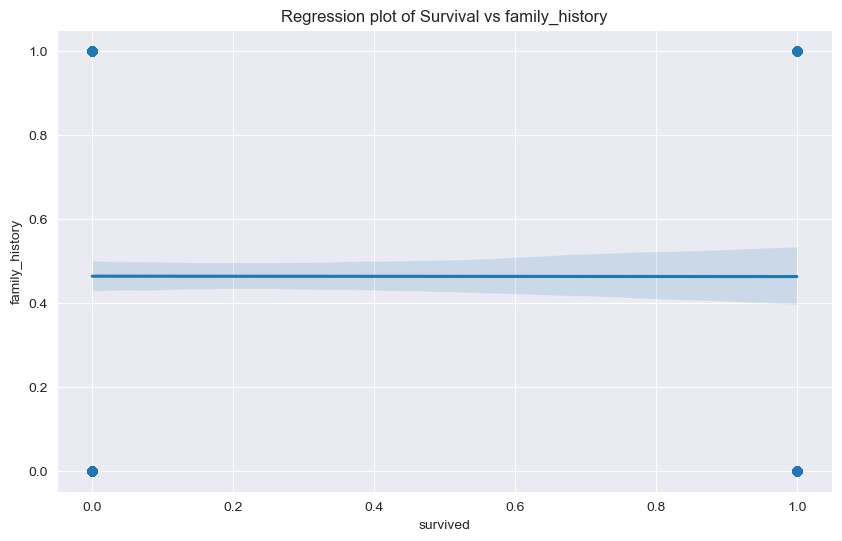

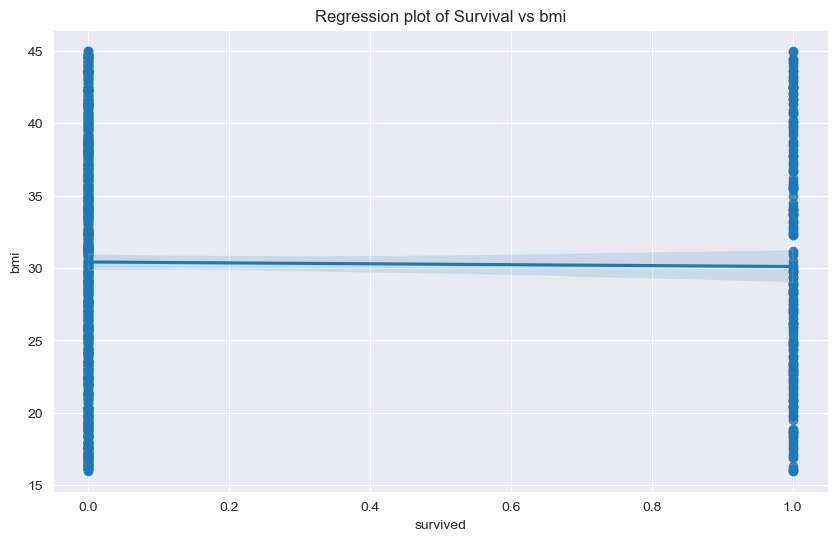

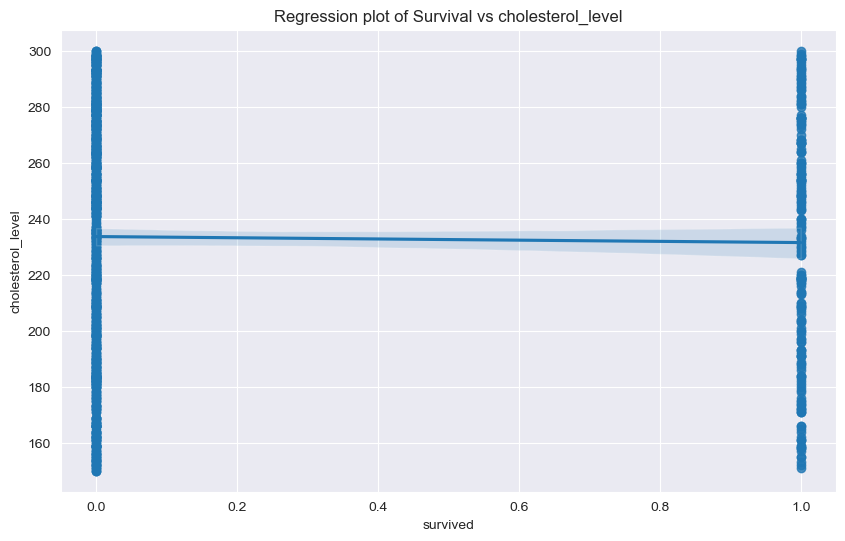

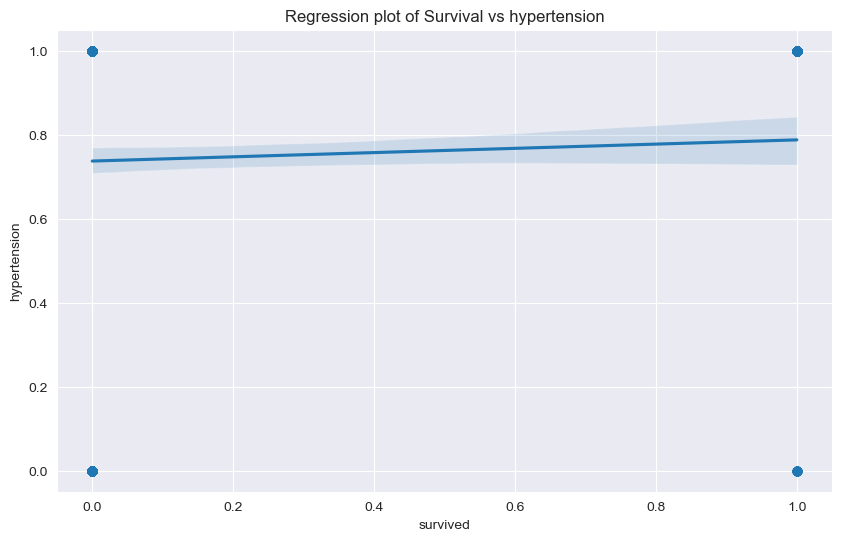

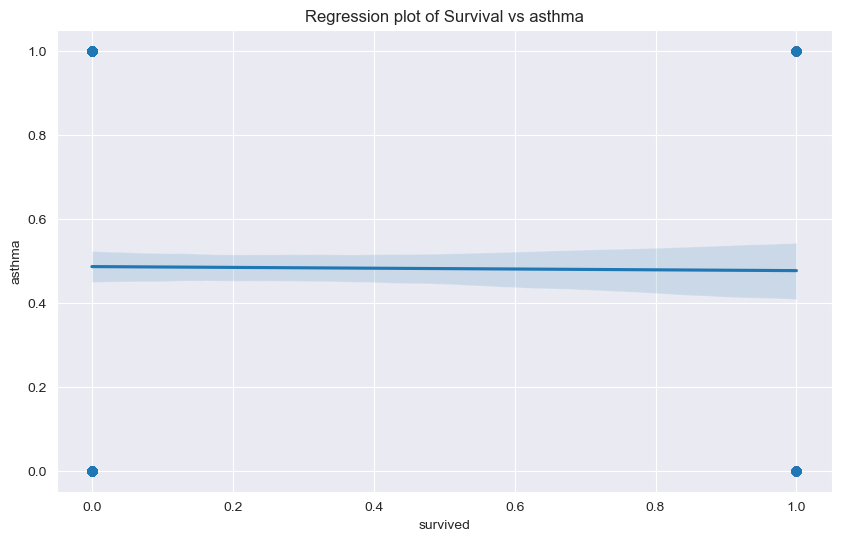

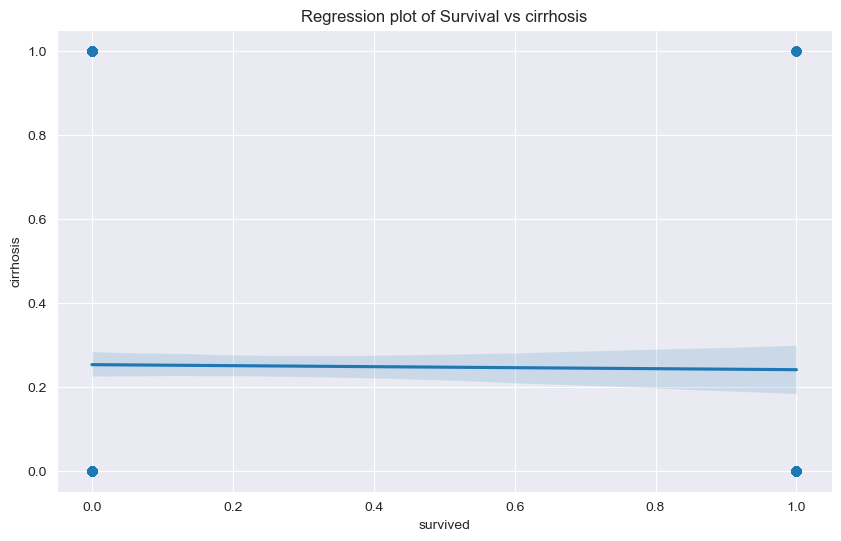

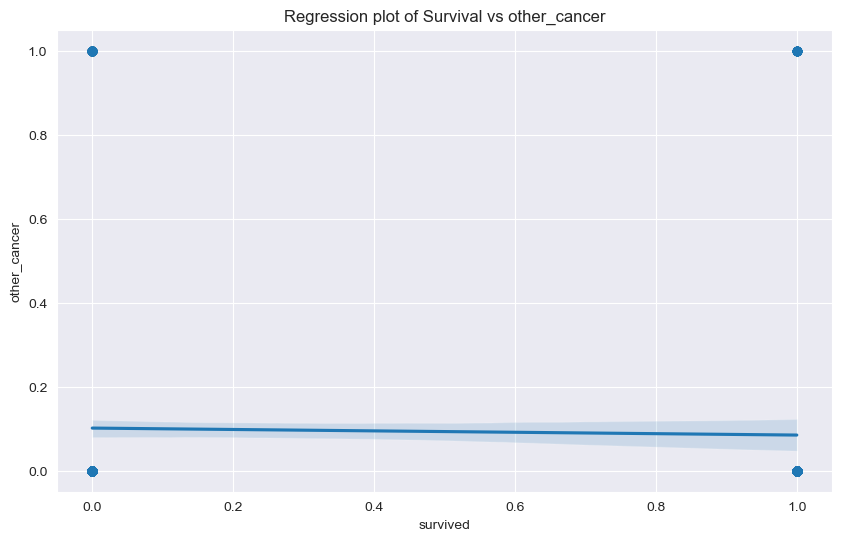

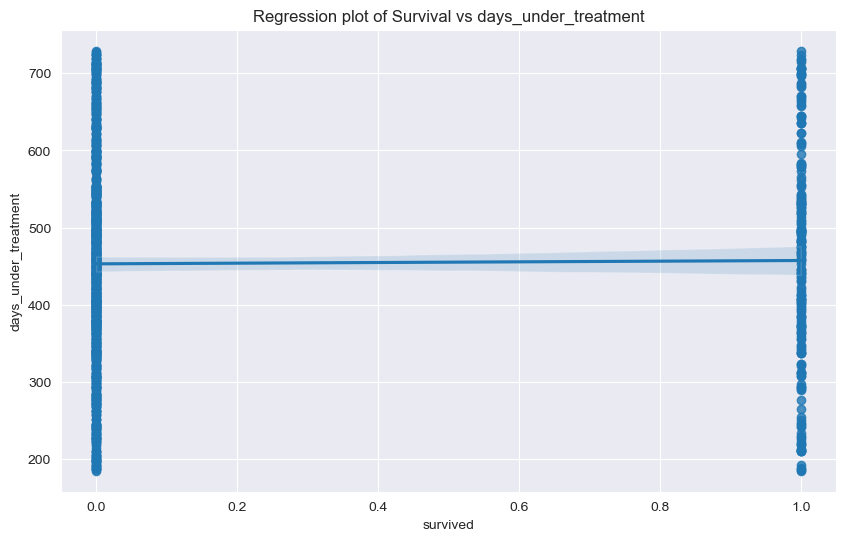

In [80]:
for col in numerical_columns:       #regplot for all the numerical columns
    plt.figure(figsize=(10, 6))
    sns.regplot(x='survived', y=col, data=df1)
    plt.title(f'Regression plot of Survival vs {col}')
    plt.show()

In [81]:
pearson_coefficients = df1[numerical_columns].corrwith(df1['survived'])
print(pearson_coefficients)

age                     0.035685
family_history         -0.000765
bmi                    -0.015421
cholesterol_level      -0.020087
hypertension            0.047472
asthma                 -0.007872
cirrhosis              -0.011301
other_cancer           -0.022844
days_under_treatment    0.012868
dtype: float64


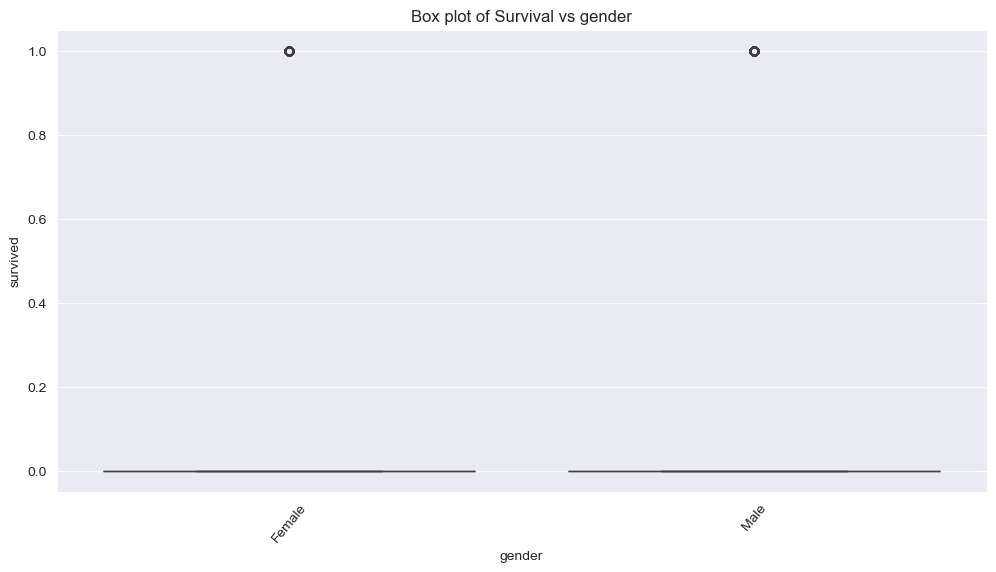

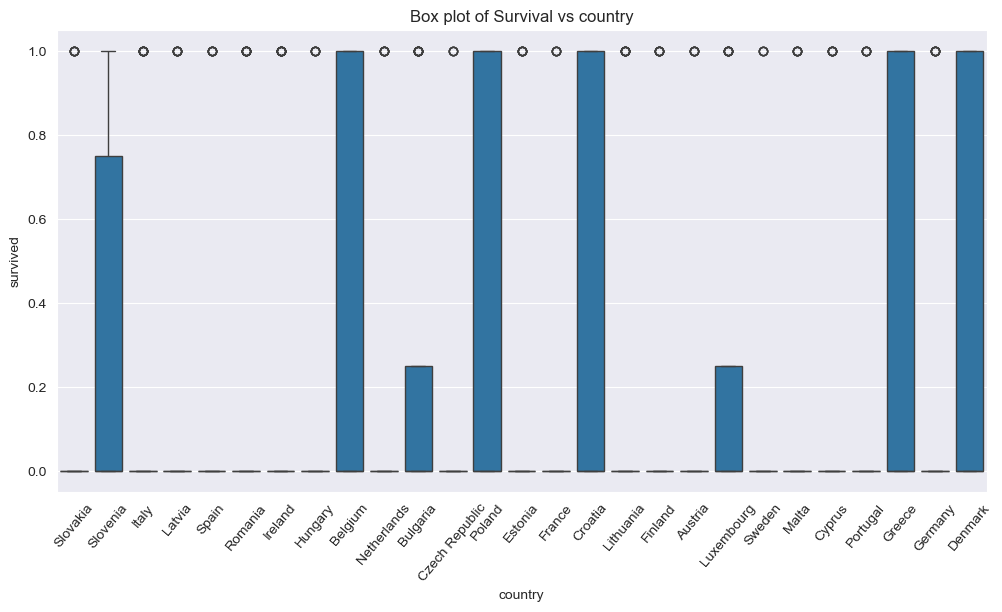

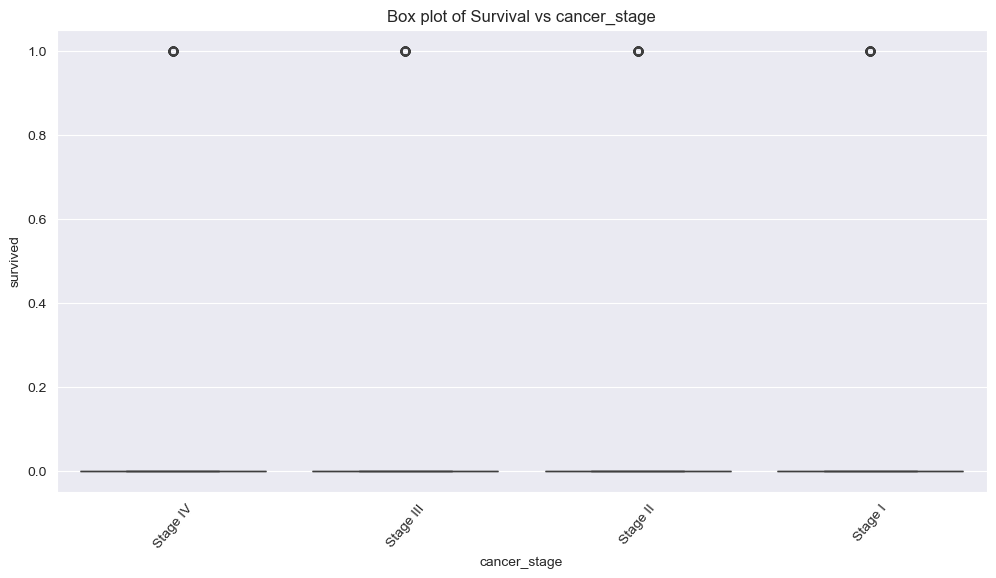

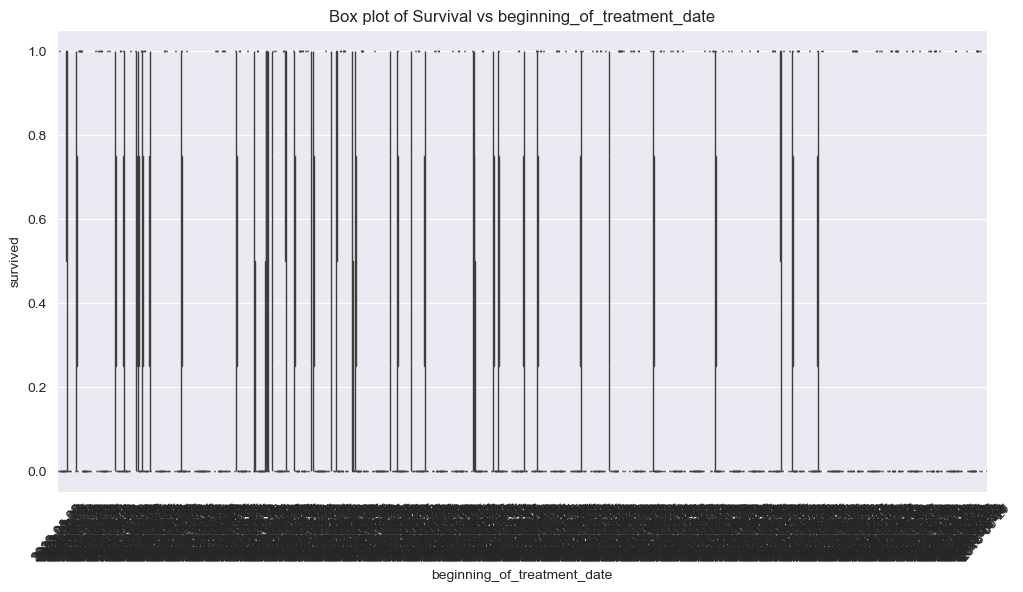

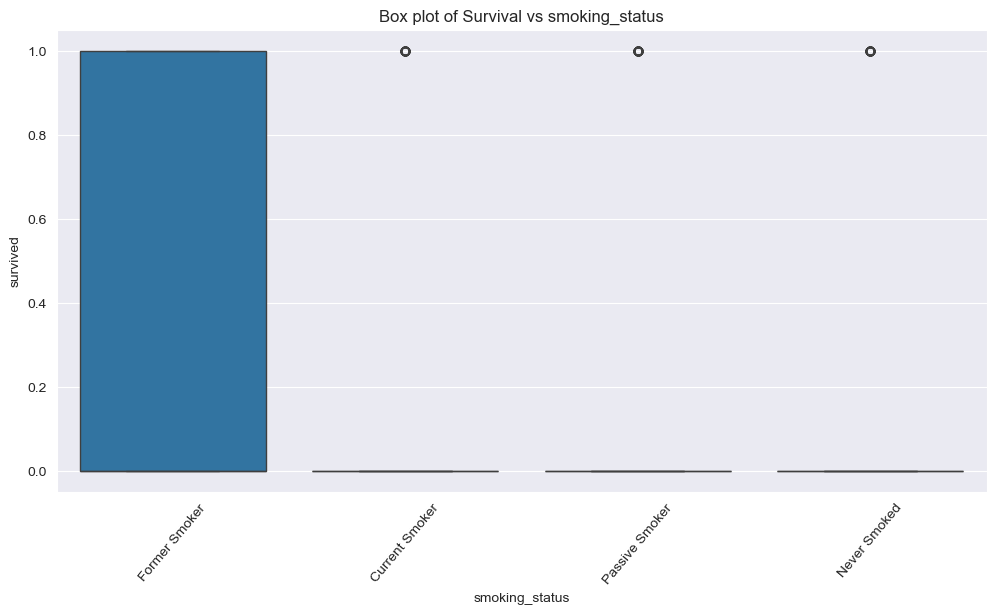

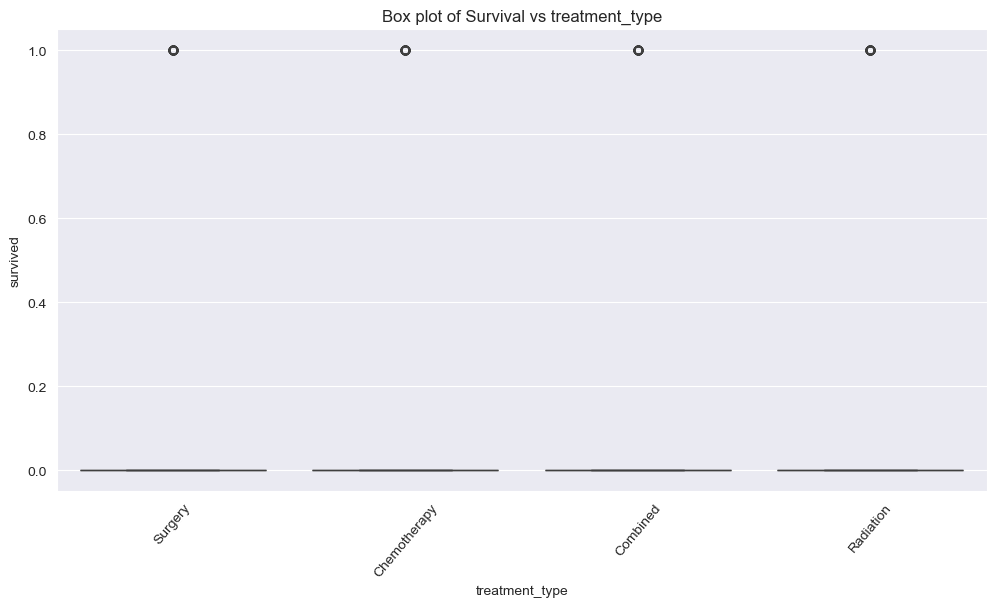

In [86]:
categorical_columns = df1.select_dtypes(include=['object', 'category']).columns.tolist()    #boxplot for all the categorical columns
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, y='survived', data=df1)
    plt.title(f'Box plot of Survival vs {col}')
    plt.xticks(rotation=50)
    plt.show()

In [91]:
anova_results = {}
for col in categorical_columns:
    groups = [df1['survived'][df1[col] == level] for level in df1[col].unique()]
    f_val, p_val = stats.f_oneway(*groups)
    anova_results[col] = {'F-Value': f_val, 'P-Value': p_val}
    anova_df = pd.DataFrame(anova_results).T
print("ANOVA Results:\n")
print(anova_df)

ANOVA Results:

                              F-Value   P-Value
gender                       1.276781  0.258770
country                      0.516522  0.979000
cancer_stage                 0.154942  0.926521
beginning_of_treatment_date  0.890139  0.811577
smoking_status               2.247304  0.081286
treatment_type               0.692079  0.556963


In [93]:
df1=df1.drop(['id','gender','country','diagnosis_date','cancer_stage','beginning_of_treatment_date','family_history','smoking_status','treatment_type','end_treatment_date'],axis=1)


KeyError: "['id', 'gender', 'country', 'diagnosis_date', 'cancer_stage', 'beginning_of_treatment_date', 'family_history', 'smoking_status', 'treatment_type', 'end_treatment_date'] not found in axis"

In [94]:
y=df1['survived']
x=df1.drop('survived',axis=1)

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [96]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train[['hypertension']], y_train)  # Replace 'feature1' with your feature column

# Predict and evaluate
y_pred = linear_regressor.predict(X_test[['hypertension']])
print("Simple Linear Regression")
print("model accuracy: ",)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Simple Linear Regression
Mean Squared Error: 0.16604636094038638
R^2 Score: -0.0008822238721299946


By negative r^2 score we can see that the model does not follow the trend of the data

In [97]:
multi_linear_regressor = LinearRegression()
multi_linear_regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = multi_linear_regressor.predict(X_test)
print("Multiple Linear Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Multiple Linear Regression
Mean Squared Error: 0.1691167863070678
R^2 Score: -0.01938991143500779


In [99]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train[['hypertension']])  # Replace 'feature1' with your feature column
X_poly_test = poly.transform(X_test[['hypertension']])

# Instantiate and fit the model
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly_train, y_train)

# Predict and evaluate
y_pred = poly_regressor.predict(X_poly_test)
print("Simple Polynomial Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Simple Polynomial Regression
Mean Squared Error: 0.16607678222656247
R^2 Score: -0.0010655950968199157


In [100]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Instantiate and fit the model
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly_train, y_train)

# Predict and evaluate
y_pred = poly_regressor.predict(X_poly_test)
print("Multiple Polynomial Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Multiple Polynomial Regression
Mean Squared Error: 0.18941112932143642
R^2 Score: -0.14171868186519831


In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Lasso regression
lasso_regressor = Lasso(alpha=0.1, max_iter=10000)  # Increase number of iterations
lasso_regressor.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = lasso_regressor.predict(X_test_scaled)
print("Lasso Regression with Scaling")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Lasso Regression with Scaling
Mean Squared Error: 0.16590624999999995
R^2 Score: -3.767329716652945e-05


In [103]:
from sklearn.linear_model import Ridge

# Instantiate and fit the model
ridge_regressor = Ridge(alpha=0.1)  # You may need to tune the alpha parameter
ridge_regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = ridge_regressor.predict(X_test)
print("Ridge Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Ridge Regression
Mean Squared Error: 0.16911589830983448
R^2 Score: -0.019384558829622867


In [104]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate and fit the model
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = decision_tree_regressor.predict(X_test)
print("Decision Tree Regressor")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Decision Tree Regressor
Mean Squared Error: 0.335
R^2 Score: -1.0192887281494873


In [105]:
from sklearn.neighbors import KNeighborsRegressor
print("\nK-Nearest Neighbors Regressor")
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_scaled, y_train)
y_pred = knn_regressor.predict(X_test_scaled)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


K-Nearest Neighbors Regressor
Mean Squared Error: 0.18220000000000006
R^2 Score: -0.09825195901145278
